In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [4]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df['Glucose'].isna().sum()

0

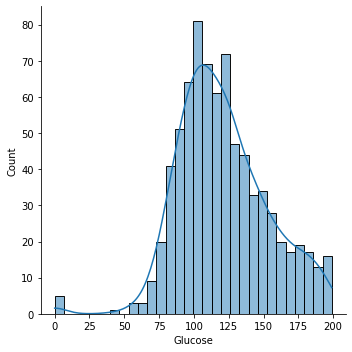

In [7]:
sns.displot(df['Glucose'],bins = 30,kde = True)

In [8]:
glucose_avg = 0
glucose_sum = 0
count = 0
for item in df['Glucose']:
    glucose_sum+=item
    count+=1
glucose_avg = glucose_sum/count
print(glucose_avg)

120.89453125


From data overview Mean is given as 121 and from calculation we got mean as 120.8945

Proceeding with Mean given in dataoverview

In [9]:
df['Glucose'] = df['Glucose'].replace(0,121)

In [10]:
df[df['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


similarly for all other columns

In [11]:
df['BloodPressure'] = df['BloodPressure'].replace(0,69.1)

In [12]:
df['SkinThickness'] = df['SkinThickness'].replace(0,20.5)

In [13]:
df['Insulin'] = df['Insulin'].replace(0,79.8)

In [14]:
df['BMI'] = df['BMI'].replace(0,7.88)

In [15]:
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].replace(0,0.47)

<AxesSubplot:>

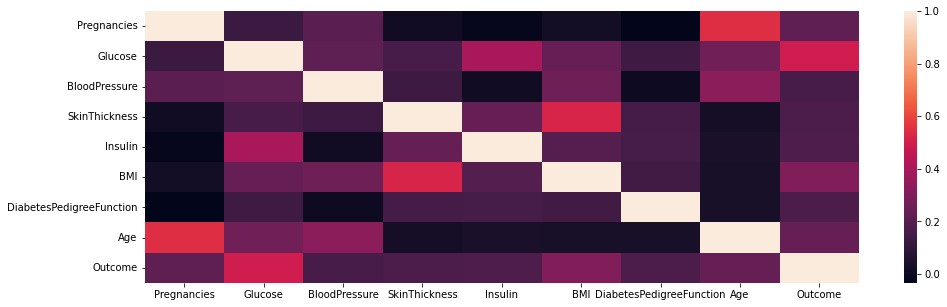

In [16]:
plt.figure(figsize = (16,5))
sns.heatmap(df.corr())


In [17]:
Y = df['Outcome']
X = df.drop('Outcome',axis = 1)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 0)

In [21]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit_transform(x_train)
ss.transform(x_test)

array([[-0.8391623 ,  2.51468285,  0.26162441, ...,  1.38506163,
         2.7617022 , -0.97315788],
       [-0.54520916, -0.50734078,  0.09372204, ...,  0.16149571,
        -0.20149854, -0.88977097],
       [ 0.0426971 , -1.52563135, -0.91369217, ...,  0.2141222 ,
        -0.24040926, -0.72299714],
       ...,
       [-0.8391623 , -0.90151778, -1.08159454, ..., -1.1146967 ,
        -0.63250956, -0.97315788],
       [-0.8391623 , -0.54018887,  0.26162441, ...,  0.674604  ,
        -0.82107688, -0.63961023],
       [ 1.8064159 , -0.01461954,  0.42952677, ..., -0.62790166,
         0.12175972,  0.94474111]])

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [24]:
y_pred = lr.predict(x_test)

In [25]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [26]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       157
           1       0.67      0.51      0.58        74

    accuracy                           0.76       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231

